## Visualize the Images: Before deciding, visualize the resized images using the code below to check if important details (like the lesions) are preserved after resizing.

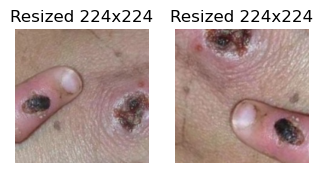

In [9]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Parameters for resizing
image_height, image_width = 224, 224  # Try with 128x128 initially

# Visualizing a few images after resizing
image_dir = 'data_aug/jpg_aug/'
image_files = sorted(os.listdir(image_dir))[8:10]  # Load first 5 images for visualization

plt.figure(figsize=(10, 5))
for i, img_file in enumerate(image_files):
    img_path = os.path.join(image_dir, img_file)
    img = Image.open(img_path).resize((image_width, image_height))  # Resize
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(f"Resized {image_height}x{image_width}")
    plt.axis('off')

plt.show()


2024-10-28 22:21:02.180401: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-28 22:21:02.374545: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-28 22:21:02.445208: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-28 22:21:02.470551: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-28 22:21:02.615396: I tensorflow/core/platform/cpu_feature_guar

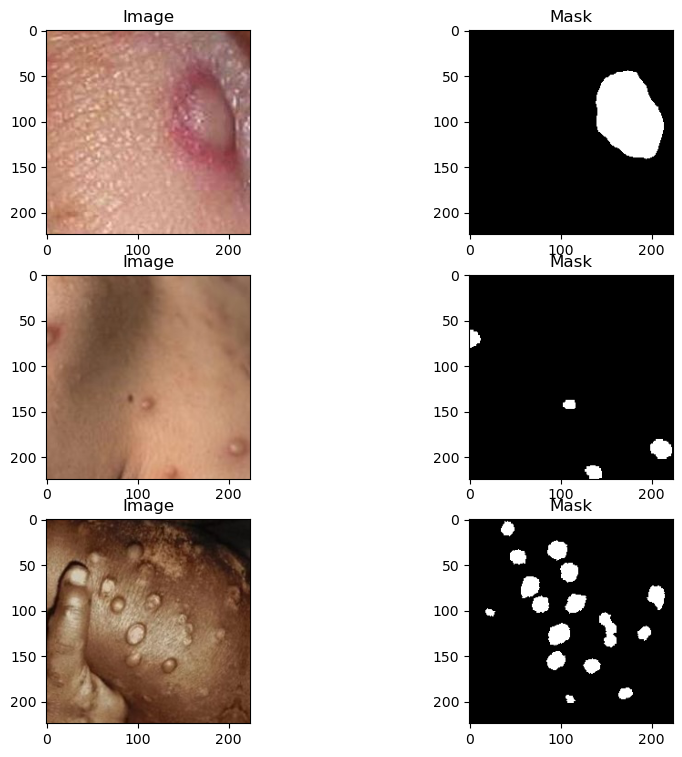

In [10]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image

# Parameters
image_height, image_width = 224, 224  # Adjust based on your requirement
image_dir = 'data_aug/jpg_aug/'
mask_dir = 'data_aug/mask_aug/'

# Load dataset
def load_images_and_masks(image_dir, mask_dir):
    images = []
    masks = []

    image_files = sorted(os.listdir(image_dir))
    mask_files = sorted(os.listdir(mask_dir))

    for img_file, mask_file in zip(image_files, mask_files):
        img_path = os.path.join(image_dir, img_file)
        mask_path = os.path.join(mask_dir, mask_file)

        # Load images and masks
        img = Image.open(img_path).resize((image_width, image_height))
        mask = Image.open(mask_path).resize((image_width, image_height))

        img = np.array(img) / 255.0  # Normalize images
        mask = np.array(mask)

        # Convert masks to binary or categorical
        mask[mask > 0] = 1  # Assuming you need binary masks
        mask = to_categorical(mask, num_classes=2)  # Two classes: background and lesion

        images.append(img)
        masks.append(mask)

    return np.array(images), np.array(masks)

# Load images and masks
images, masks = load_images_and_masks(image_dir, mask_dir)

# Split dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, masks, test_size=0.2, random_state=42)

# Visualize some samples
def visualize_samples(images, masks, num_samples=3):
    plt.figure(figsize=(10, num_samples * 3))
    for i in range(num_samples):
        plt.subplot(num_samples, 2, i*2+1)
        plt.imshow(images[i])
        plt.title("Image")

        plt.subplot(num_samples, 2, i*2+2)
        plt.imshow(np.argmax(masks[i], axis=-1), cmap='gray')  # Convert categorical mask back to binary for display
        plt.title("Mask")

    plt.show()

visualize_samples(X_train, y_train)


## Visualize Random Images and Their Masks

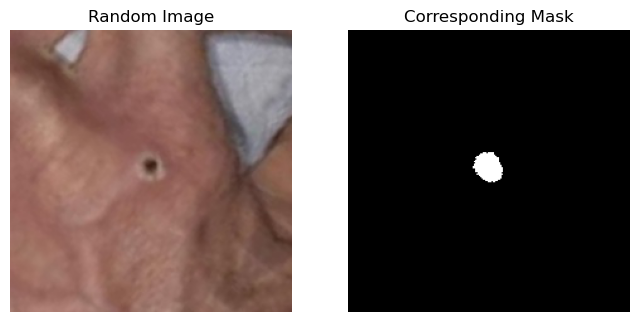

In [14]:


import random

# Visualizing random images with their masks
def visualize_random_sample(images, masks):
    index = random.randint(0, len(images) - 1)  # Pick a random index
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(images[index])
    plt.title("Random Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(np.argmax(masks[index], axis=-1), cmap='gray')  # Convert categorical mask to binary for display
    plt.title("Corresponding Mask")
    plt.axis('off')

    plt.show()

# Call function
visualize_random_sample(X_train, y_train)


## Check for Class Imbalance in Masks

In [15]:
def visualize_mask_distribution(masks):
    # Calculate the ratio of lesion pixels in the masks
    lesion_pixels = np.sum(np.argmax(masks, axis=-1))  # Get the lesion pixels (class 1)
    total_pixels = masks.shape[0] * masks.shape[1] * masks.shape[2]

    print(f"Lesion pixels: {lesion_pixels}")
    print(f"Total pixels: {total_pixels}")
    print(f"Lesion pixel ratio: {lesion_pixels / total_pixels * 100:.2f}%")

# Call function
visualize_mask_distribution(y_train)


Lesion pixels: 1216796
Total pixels: 17862656
Lesion pixel ratio: 6.81%


## Visualize Image and Mask Shapes

In [16]:
# Check image and mask shapes
def check_shapes(images, masks):
    image_shapes = [img.shape for img in images]
    mask_shapes = [mask.shape for mask in masks]

    # Check if all shapes are consistent
    print(f"Unique image shapes: {set(image_shapes)}")
    print(f"Unique mask shapes: {set(mask_shapes)}")

check_shapes(X_train, y_train)


Unique image shapes: {(224, 224, 3)}
Unique mask shapes: {(224, 224, 2)}


## Visualize Augmented Data (Optional)

/home/salman/anaconda3/lib/python3.12/site-packages/keras/src/legacy/preprocessing/image.py:619: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 224, 224, 2) (2 channels).
  warnings.warn(


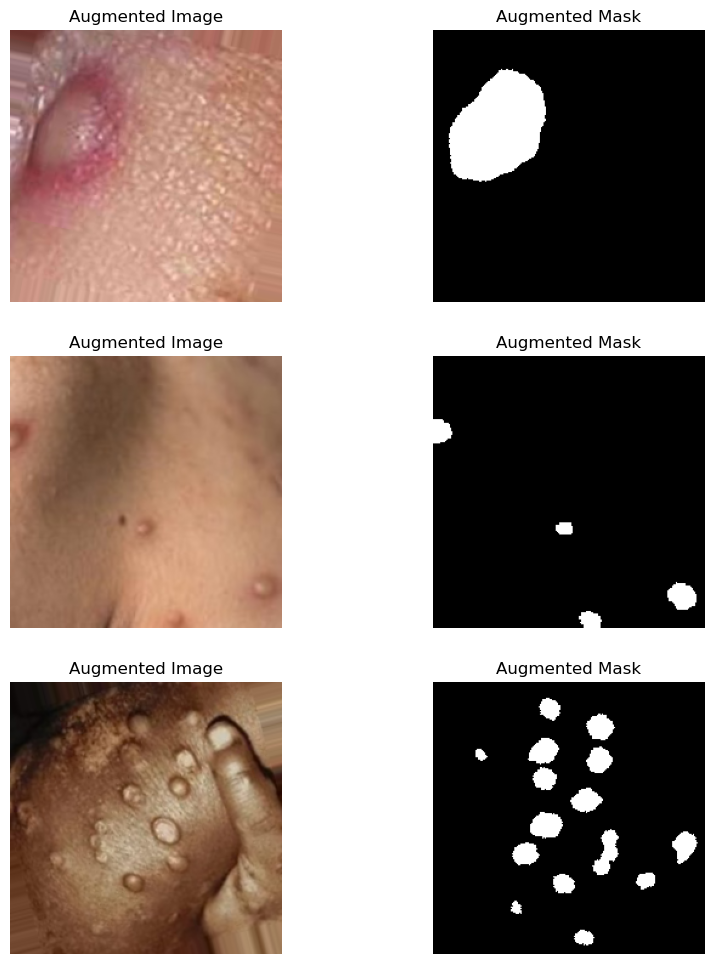

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Example augmentation
datagen = ImageDataGenerator(rotation_range=30, horizontal_flip=True)

def visualize_augmented_data(images, masks, datagen, num_samples=3):
    plt.figure(figsize=(10, num_samples * 4))
    
    for i in range(num_samples):
        img, mask = images[i], masks[i]
        # Augment image and mask together
        img_aug = next(datagen.flow(np.expand_dims(img, 0), batch_size=1))[0]
        mask_aug = next(datagen.flow(np.expand_dims(mask, 0), batch_size=1))[0]

        plt.subplot(num_samples, 2, i*2 + 1)
        plt.imshow(img_aug)
        plt.title("Augmented Image")
        plt.axis('off')

        plt.subplot(num_samples, 2, i*2 + 2)
        plt.imshow(np.argmax(mask_aug, axis=-1), cmap='gray')  # Show augmented mask
        plt.title("Augmented Mask")
        plt.axis('off')

    plt.show()

# Call function
visualize_augmented_data(X_train, y_train, datagen)


## Check for Duplicates or Inconsistent Masks

In [18]:
def check_inconsistent_masks(masks):
    inconsistent_masks = [i for i, mask in enumerate(masks) if np.all(mask == 0) or np.all(mask == 1)]
    if inconsistent_masks:
        print(f"Found {len(inconsistent_masks)} inconsistent masks (all-black or all-white).")
    else:
        print("No inconsistent masks found.")
        
check_inconsistent_masks(y_train)


No inconsistent masks found.


# Histogram of Pixel Values

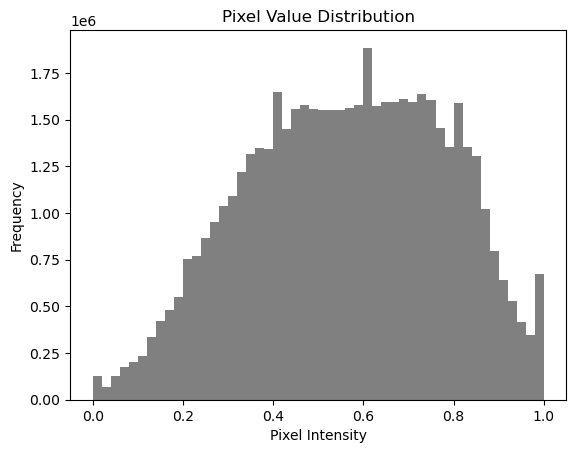

In [19]:
def plot_pixel_distribution(images):
    pixel_values = images.flatten()
    plt.hist(pixel_values, bins=50, color='gray')
    plt.title("Pixel Value Distribution")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

plot_pixel_distribution(X_train)


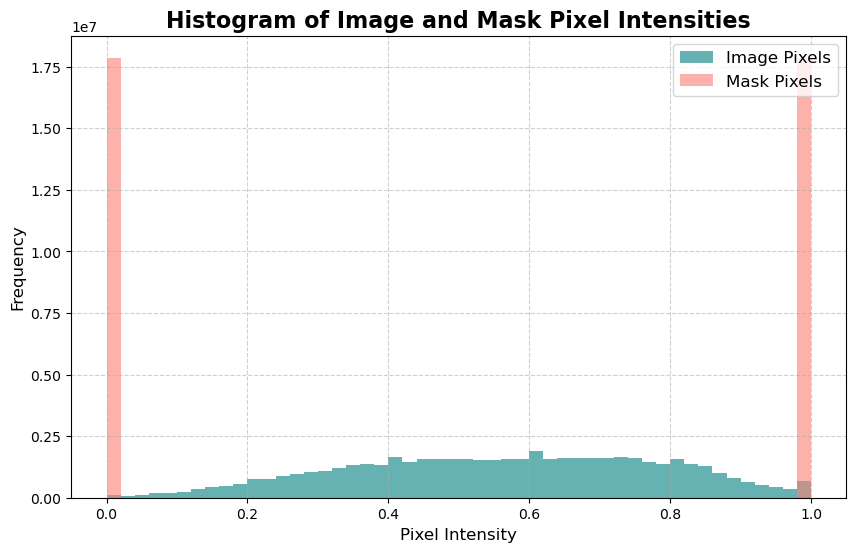

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot a combined histogram of image and mask pixel intensities with enhanced colors
def plot_combined_pixel_histogram(images, masks):
    # Flatten all image and mask pixels
    image_pixels = np.concatenate([image.flatten() for image in images])
    mask_pixels = np.concatenate([mask.flatten() for mask in masks])

    # Plot combined histogram with enhanced colors
    plt.figure(figsize=(10, 6))

    # Histogram of image pixel intensities (teal color)
    plt.hist(image_pixels, bins=50, color='teal', alpha=0.6, label='Image Pixels')

    # Histogram of mask pixel intensities (salmon color)
    plt.hist(mask_pixels, bins=50, color='salmon', alpha=0.6, label='Mask Pixels')

    # Titles and labels
    plt.title("Histogram of Image and Mask Pixel Intensities", fontsize=16, weight='bold')
    plt.xlabel("Pixel Intensity", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.legend(loc='upper right', fontsize=12)

    # Adding grid for better readability
    plt.grid(True, linestyle='--', alpha=0.6)

    # Show plot
    plt.show()

# Assuming `X_train` contains the images and `y_train` contains the masks
plot_combined_pixel_histogram(X_train, y_train)


In [22]:
# Sample image and mask (replace with actual file names)
sample_img = os.path.join(image_dir, 'mkp_018_aug_4.jpg')  # Replace 'sample_image.jpg' with a valid image name
sample_mask = os.path.join(mask_dir, 'mkp_018_aug_4.png')  # Replace 'sample_image.png' with the corresponding mask

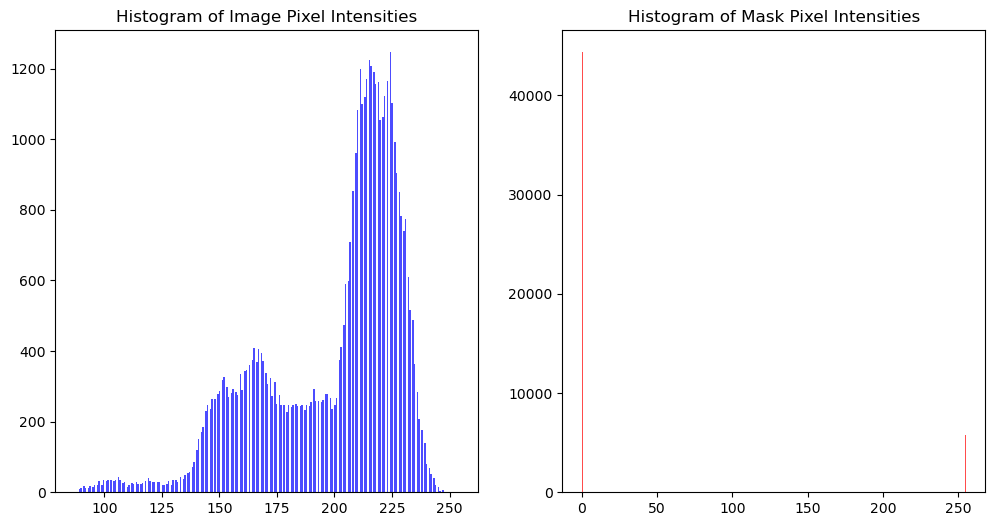

In [24]:
import cv2
def plot_histogram(image_path, mask_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(img.ravel(), bins=256, color='blue', alpha=0.7)
    plt.title('Histogram of Image Pixel Intensities')

    plt.subplot(1, 2, 2)
    plt.hist(mask.ravel(), bins=256, color='red', alpha=0.7)
    plt.title('Histogram of Mask Pixel Intensities')

    plt.show()

plot_histogram(sample_img, sample_mask)


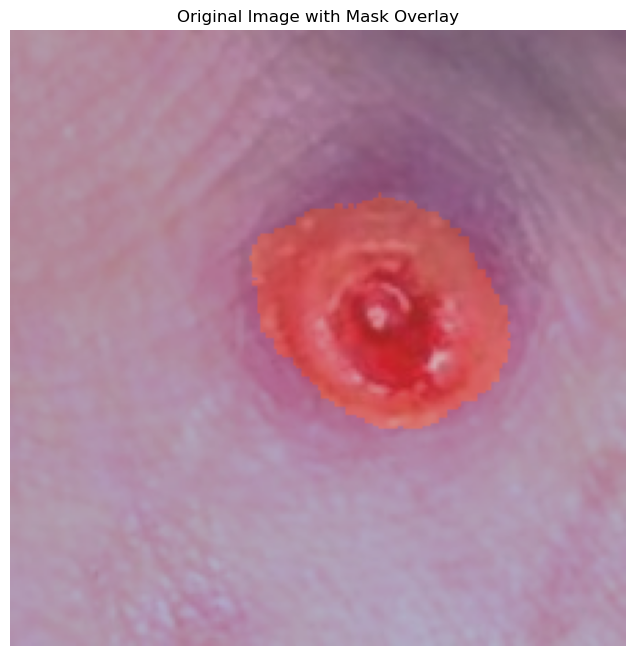

In [25]:
def overlay_mask_on_image(image_path, mask_path):
    # Load the image and mask
    img = cv2.imread(image_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # Resize mask to match image dimensions if needed
    mask = cv2.resize(mask, (img.shape[1], img.shape[0]))

    # Create a color version of the mask for better visibility
    colored_mask = cv2.applyColorMap(mask, cv2.COLORMAP_JET)

    # Overlay the mask on the original image (with alpha blending)
    overlay = cv2.addWeighted(img, 0.7, colored_mask, 0.3, 0)

    # Display the image with the mask overlaid
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    plt.title('Original Image with Mask Overlay')
    plt.axis('off')
    plt.show()

# Test with a sample image and mask
overlay_mask_on_image(sample_img, sample_mask)


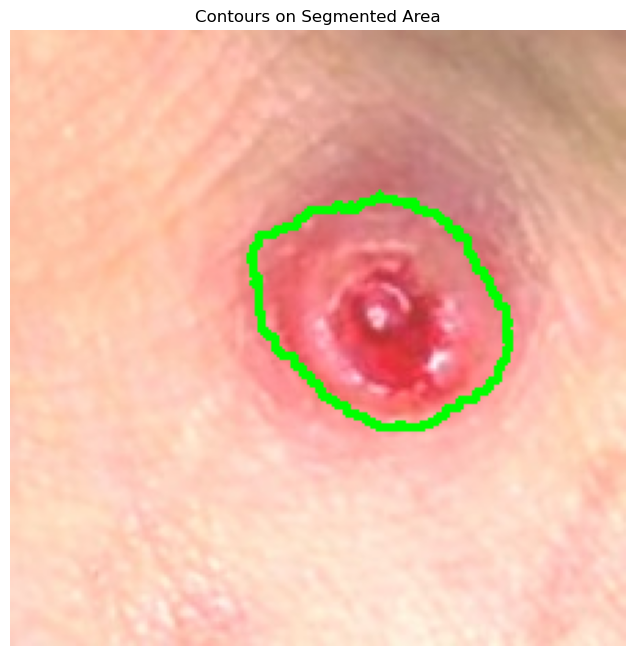

In [26]:
def display_contours(image_path, mask_path):
    # Load the image and mask
    img = cv2.imread(image_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # Find contours from the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the original image
    contour_img = cv2.drawContours(img.copy(), contours, -1, (0, 255, 0), 2)

    # Display the image with contours
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
    plt.title('Contours on Segmented Area')
    plt.axis('off')
    plt.show()

# Test with a sample image and mask
display_contours(sample_img, sample_mask)


/home/salman/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=x, y=y, **kwargs)
/home/salman/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=x, y=y, **kwargs)


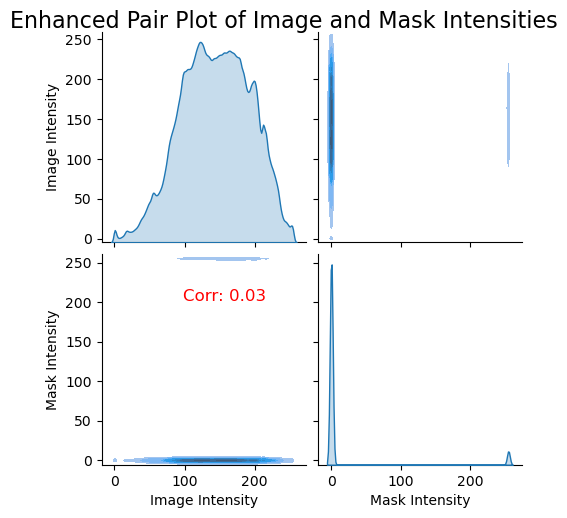

In [27]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

def prepare_pairplot_data(image_dir, mask_dir, sample_size=1000):
    img_pixel_values = []
    mask_pixel_values = []
    
    # Get lists of image and mask paths
    image_paths = [os.path.join(image_dir, f) for f in os.listdir(image_dir)]
    mask_paths = [os.path.join(mask_dir, f) for f in os.listdir(mask_dir)]
    
    # Ensure same number of images and masks
    assert len(image_paths) == len(mask_paths), "Number of images and masks must match."
    
    # Randomly sample pairs if necessary
    indices = np.random.choice(len(image_paths), size=min(sample_size, len(image_paths)), replace=False)
    
    for i in indices:
        img_path = image_paths[i]
        mask_path = mask_paths[i]

        # Load images and masks as grayscale
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        # Flatten pixel values into 1D arrays
        img_flat = img.ravel()
        mask_flat = mask.ravel()

        # Store values
        img_pixel_values.extend(img_flat)
        mask_pixel_values.extend(mask_flat)

    # Create a DataFrame for pair plotting
    data = pd.DataFrame({
        'Image Intensity': img_pixel_values,
        'Mask Intensity': mask_pixel_values
    })
    
    return data

# Function to plot enhanced pair plot
def plot_enhanced_pairplot(image_dir, mask_dir, sample_size=1000):
    data = prepare_pairplot_data(image_dir, mask_dir, sample_size)

    # Pair plot with KDE (Kernel Density Estimation) for better visual interpretation
    pair_plot = sns.pairplot(data, kind='kde', diag_kind='kde', plot_kws={'shade': True, 'bw_adjust': 0.5})
    
    # Add correlation coefficients to the plot
    for i, j in zip(*np.tril_indices_from(pair_plot.axes, -1)):
        img_col = data.iloc[:, i]
        mask_col = data.iloc[:, j]
        
        # Compute correlation (Pearson's correlation)
        corr = np.corrcoef(img_col, mask_col)[0, 1]
        
        # Add text annotations for correlation coefficient
        pair_plot.axes[i, j].annotate(f'Corr: {corr:.2f}', (0.6, 0.8), xycoords='axes fraction', ha='center', va='center', fontsize=12, color='red')
    
    plt.suptitle('Enhanced Pair Plot of Image and Mask Intensities', y=1.02, fontsize=16)
    plt.show()

# Directories for images and masks
image_dir = 'data_aug/jpg_aug'
mask_dir = 'data_aug/mask_aug'

# Plot enhanced pair plot
plot_enhanced_pairplot(image_dir, mask_dir, sample_size=1000)
